In [2]:
%pip install tensorflow tensorflow-gpu pandas matplotlib sklearn

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("train.csv")
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [6]:
%pip list

Package                      Version
---------------------------- ------------
absl-py                      2.0.0
asttokens                    2.4.1
astunparse                   1.6.3
cachetools                   5.3.2
certifi                      2023.11.17
charset-normalizer           3.3.2
colorama                     0.4.6
comm                         0.2.1
contourpy                    1.2.0
cycler                       0.12.1
debugpy                      1.8.0
decorator                    5.1.1
exceptiongroup               1.2.0
executing                    2.0.1
flatbuffers                  23.5.26
fonttools                    4.47.0
gast                         0.5.4
google-auth                  2.26.1
google-auth-oauthlib         1.2.0
google-pasta                 0.2.0
grpcio                       1.60.0
h5py                         3.10.0
idna                         3.6
ipykernel                    6.28.0
ipython                      8.19.0
jedi                         0.19.


[notice] A new release of pip available: 22.2.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
from tensorflow.keras.layers import TextVectorization

In [8]:
#Our input/ sentences to check.
X = df['comment_text']
# Our target variable where it checks the sentences is bad or good. Starting it from second columns until the last columns.
Y = df[df.columns[2:]].values

In [9]:
#Check first 5 rows of X values.
X.head()

0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
3    "\nMore\nI can't make any real suggestions on ...
4    You, sir, are my hero. Any chance you remember...
Name: comment_text, dtype: object

In [10]:
#max tokens = how many words, output_sequence_length = the sentences
vectorizer = TextVectorization(max_tokens=40000, output_mode='int', output_sequence_length=2000)
#We are storing X.values because we want to store numpy array
vectorizer.adapt(X.values)


In [11]:
#It shows which number represnets what, as an example 'UNK = unkown words, 'the' represnets 2.
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'you',
 'i',
 'is',
 'that',
 'in',
 'it',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'have',
 'are',
 'your',
 'with',
 'if',
 'article',
 'was',
 'or',
 'but',
 'page',
 'my',
 'an',
 'from',
 'by',
 'do',
 'at',
 'about',
 'me',
 'so',
 'wikipedia',
 'can',
 'what',
 'there',
 'all',
 'has',
 'will',
 'talk',
 'please',
 'would',
 'its',
 'no',
 'one',
 'just',
 'like',
 'they',
 'he',
 'dont',
 'which',
 'any',
 'been',
 'should',
 'more',
 'we',
 'some',
 'other',
 'who',
 'see',
 'here',
 'also',
 'his',
 'think',
 'im',
 'because',
 'know',
 'how',
 'am',
 'people',
 'why',
 'edit',
 'articles',
 'only',
 'out',
 'up',
 'when',
 'were',
 'use',
 'then',
 'may',
 'time',
 'did',
 'them',
 'now',
 'being',
 'their',
 'than',
 'thanks',
 'even',
 'get',
 'make',
 'good',
 'had',
 'very',
 'information',
 'does',
 'could',
 'well',
 'want',
 'such',
 'sources',
 'way',
 'name',
 'these',
 'deletion',
 'pages',
 'first',
 'help'

In [12]:
#Hello world represented by number 288,263, "[:2] represents first two words" 
vectorizer("Hello world")[:2]

<tf.Tensor: shape=(2,), dtype=int64, numpy=array([288, 263], dtype=int64)>

In [13]:
text_vectorized = vectorizer(X.values)

In [14]:
#The shape represnets (sample number, length(max) of the sentences)
text_vectorized

<tf.Tensor: shape=(159571, 2000), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]], dtype=int64)>

<h>Pipeline part<h>

In [15]:
#Convert memory data in to a tensorflow dataset.
dataset = tf.data.Dataset.from_tensor_slices((text_vectorized, Y))
#We do this to improve performance by avoiding redundant data loading.
dataset = dataset.cache()
#Shuffling everytime it runs to improve generalization, reduce a bias.
dataset = dataset.batch(16)
#get the next batch ahead so it can reduce a data loading time.
dataset = dataset.prefetch(8)

In [16]:
#batch of data set not the actual number, if we do len(dataset)*16(since we set it to 16) it will equal to the original numbers of datas.
len(dataset)

9974

In [17]:
#70% of the data set goes to training data and 20% goes to validation and the rest goes to testing datas.
train_size = int(0.7 * len(dataset))
val_size = int(0.2 * len(dataset))
test_size = int(0.1 * len(dataset))

In [18]:
#Using the above weight applied it to datasets.
train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size).take(val_size)
test_dataset = dataset.skip(train_size+val_size).take(test_size)

In [19]:
len(train_dataset)

6981

In [20]:
len(val_dataset)

1994

In [21]:
len(test_dataset)

997

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding
from matplotlib import pyplot as plt


In [23]:
model = Sequential()
model.add(Embedding(40000+1,32))
model.add(Bidirectional(LSTM(32, activation='tanh')))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
#The final layer should match the number of output in Y value.
model.add(Dense(6, activation='sigmoid'))

In [24]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          1280032   
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [26]:
result = model.fit(train_dataset, epochs=5, validation_data=val_dataset)


Epoch 1/5
6981/6981 [==============================] - 3891s 557ms/step - loss: 0.0619 - val_loss: 0.0495
Epoch 2/5
6981/6981 [==============================] - 3856s 552ms/step - loss: 0.0461 - val_loss: 0.0486
Epoch 3/5
6981/6981 [==============================] - 3850s 552ms/step - loss: 0.0408 - val_loss: 0.0541
Epoch 4/5
6981/6981 [==============================] - 3916s 561ms/step - loss: 0.0357 - val_loss: 0.0612
Epoch 5/5
6981/6981 [==============================] - 4755s 681ms/step - loss: 0.0313 - val_loss: 0.0717


<Figure size 800x600 with 0 Axes>

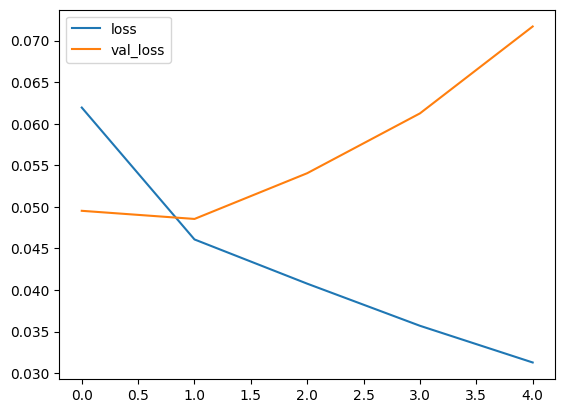

In [28]:
plt.figure(figsize=(8,6))
pd.DataFrame(result.history).plot()
plt.show()

Prediction


In [90]:
inputs = vectorizer('I fucking hate you')

In [91]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [92]:
model.predict(np.expand_dims(inputs,0))


1/1 [==============================] - 0s 78ms/step


array([[0.9998332 , 0.3365335 , 0.9973669 , 0.00362626, 0.9261159 ,
        0.02449782]], dtype=float32)

Evaluate

In [93]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy


In [94]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [95]:
for batch in test_dataset.as_numpy_iterator(): 
    # Unpack the batch 
    X_true, y_true = batch
    # Make a prediction 
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 109ms/step


In [96]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')


Precision: 0.780789852142334, Recall:0.6536844968795776, Accuracy:0.42728185653686523
